# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Declare Variables for future use
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
iCount = 0
setCount = 1

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list
for index, city in enumerate(cities, start = 1):
    try:
        #Get a request from the API
        response = requests.get(query_url + city).json()
        
        #Append data to each corresponding list from the API
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        #Break up processing in sets of 50 for easier reading of output
        #Checks if the ICount is less than 50, if it is, keep incrementing
        if iCount > 49:
            iCount = 0
            setCount += 1
        #Once the iCount is above 50, create a new set and continue grouping records by 50 again
        else:
            iCount += 1
            
        print(f"Processing index: {iCount} Set: {setCount} : {city}") 
    
    #Excepetion error when no city was found when pullling data from the API
    except(KeyError, IndexError):
        print("City not found")

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not f

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


## Convert Raw Data to DataFrame
* Save as csv

In [5]:
#Convert data appended to lists, into a single dataframe for easier manipulation
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_df.head()

#Come back later and re-format the "Date" Column

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [6]:
#Save the new dataframe into a csv file
weather_df.to_csv(output_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

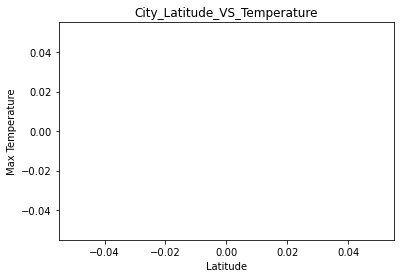

In [7]:
#Create a scatter plot, comparing Lat(x_axis) and Max Temp (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")

#Format the Graph properties
plt.title("City_Latitude_VS_Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#Save the Graph in a .png file in the Images Folder
plt.savefig("Images/City_Latitude_VS_Temperature.png")

### Latitude vs. Humidity Plot

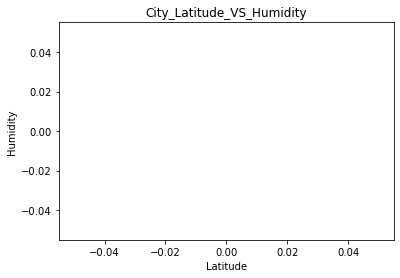

In [8]:
#Create a scatter plot, comparing Lat(x_axis) and Humidity (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue", edgecolor = "black")

#Format the Graph properties
plt.title("City_Latitude_VS_Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save the Graph in a .png file in the Images Folder
plt.savefig("Images/City_Latitude_VS_Humidity.png")

### Latitude vs. Cloudiness Plot

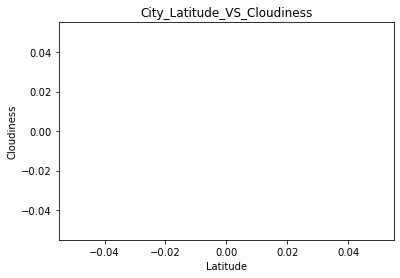

In [9]:
#Create a scatter plot, comparing Lat(x_axis) and Cloudiness (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "cyan", edgecolor = "black")

#Format the Graph properties
plt.title("City_Latitude_VS_Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save the Graph in a .png file in the Images Folder
plt.savefig("Images/City_Latitude_VS_Cloudiness.png")

### Latitude vs. Wind Speed Plot

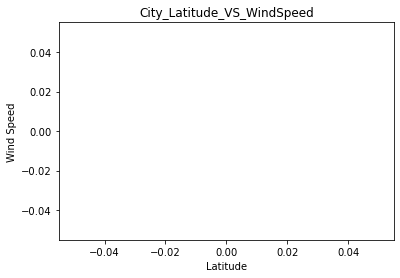

In [10]:
#Create a scatter plot, comparing Lat(x_axis) and Wind Speed (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "green", edgecolor = "black")

#Format the Graph properties
plt.title("City_Latitude_VS_WindSpeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save the Graph in a .png file in the Images Folder
plt.savefig("Images/City_Latitude_VS_WindSpeed.png")

## Linear Regression

### Write linear regression plot function (optional)

In [11]:
#Split the weather_df into two dataframes 
#northern and southern hemisphere
northernHemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southernHemisphere = weather_df.loc[weather_df["Lat"] < 0]

print(northernHemisphere.head())
print(southernHemisphere.head())

Empty DataFrame
Columns: [City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed]
Index: []
Empty DataFrame
Columns: [City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed]
Index: []


In [12]:
#Define LinearRegression function for use in later scatter plots

#Function to print out line graph, representing the Linear Regression
def plotLineGraph(x,y):
    plt.plot(x,y,"r")

#Function to print out the scatter plot of the data being compared
def plotScatterGraph(x,y):
    plt.scatter(x,y)

#Function to Annotate the linear regression formula onto the graph
def annotate(equation,a,b):
    plt.annotate(equation,(a,b),fontsize = 20, color = "red")
    
#Function to calculate Linear Regression and call the plot functions to ouput the graphs
def linearRegression(x,y):
    print(f"r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (mslope, bintercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    linEquation = "y = " + str(round(mslope,2)) + "x + " + str(round(bintercept,2))
    regressValue = (x * mslope) + bintercept
    plotScatterGraph(x,y)
    plotLineGraph(x, regressValue)
    return linEquation

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
#Create A scatter plot, comparing the Max Temp and Latitude for the Northern Hemisphere

#Call Function to calculate the Linear Regression and output the r-squared value and the graphs
equation = linearRegression(northernHemisphere["Lat"], northernHemisphere["Max Temp"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, 0, 20)

#Format the Graph
plt.title("Northern_Hemisphere-Max_Temp_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Northern_Hemisphere-Max_Temp_VS_Latitude-LinearRegression.png")

ValueError: x and y must have length at least 2.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Create A scatter plot, comparing the Max Temp and Latitude for the Southern Hemisphere

#Call Function to calculate the Linear Agression and output the r-squared value and the graphs
equation = linearRegression(southernHemisphere["Lat"], southernHemisphere["Max Temp"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, -55, 85)

#Format the Graph
plt.title("Southern_Hemisphere-Max_Temp_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Southern_Hemisphere-Max_Temp_VS_Latitude-LinearRegression.png")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Create A scatter plot, comparing the Humidity and Latitude for the Northern Hemisphere

#Call Function to calculate the Linear Regression and output the r-squared value and the graphs
equation = linearRegression(northernHemisphere["Lat"], northernHemisphere["Humidity"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, 40, 20)

#Format the Graph
plt.title("Northern_Hemisphere-Humidity_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Northern_Hemisphere-Humidity_VS_Latitude-LinearRegression.png")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Create A scatter plot, comparing the Humidity and Latitude for the Southern Hemisphere

#Call Function to calculate the Linear Agression and output the r-squared value and the graphs
equation = linearRegression(southernHemisphere["Lat"], southernHemisphere["Humidity"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, -55, 25)

#Format the Graph
plt.title("Southern_Hemisphere-Humidity_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Southern_Hemisphere-Humidity_VS_Latitude-LinearRegression.png")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Create A scatter plot, comparing the Cloudiness and Latitude for the Northern Hemisphere

#Call Function to calculate the Linear Regression and output the r-squared value and the graphs
equation = linearRegression(northernHemisphere["Lat"], northernHemisphere["Cloudiness"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, 0, 30)

#Format the Graph
plt.title("Northern_Hemisphere-Cloudiness_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Northern_Hemisphere-Cloudiness_VS_Latitude-LinearRegression.png")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Create A scatter plot, comparing the Cloudiness and Latitude for the Southern Hemisphere

#Call Function to calculate the Linear Agression and output the r-squared value and the graphs
equation = linearRegression(southernHemisphere["Lat"], southernHemisphere["Cloudiness"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, -55, 80)

#Format the Graph
plt.title("Southern_Hemisphere-Cloudiness_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Southern_Hemisphere-Cloudiness_VS_Latitude-LinearRegression.png")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Create A scatter plot, comparing the Wind Speed and Latitude for the Northern Hemisphere

#Call Function to calculate the Linear Regression and output the r-squared value and the graphs
equation = linearRegression(northernHemisphere["Lat"], northernHemisphere["Wind Speed"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, 0, 28)

#Format the Graph
plt.title("Northern_Hemisphere-Wind Speed_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Northern_Hemisphere-Wind Speed_VS_Latitude-LinearRegression.png")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Create A scatter plot, comparing the Wind Speed and Latitude for the Southern Hemisphere

#Call Function to calculate the Linear Agression and output the r-squared value and the graphs
equation = linearRegression(southernHemisphere["Lat"], southernHemisphere["Wind Speed"])

#Call the Annotate Function to display the linear Regression Formula
annotate(equation, -30, 20)

#Format the Graph
plt.title("Southern_Hemisphere-Wind_Speed_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save the plot to a png image in the Images Folder
plt.savefig("Images/Southern_Hemisphere-Wind_Speed_VS_Latitude-LinearRegression.png")